In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./P4AI_BT1.csv")

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

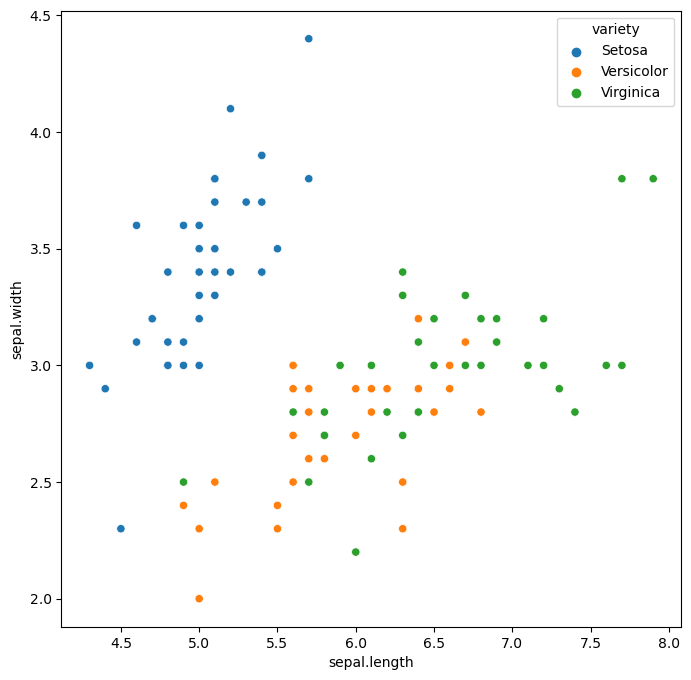

In [3]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'sepal.length' , y= 'sepal.width', data = df, hue = 'variety')

<AxesSubplot:xlabel='petal.length', ylabel='petal.width'>

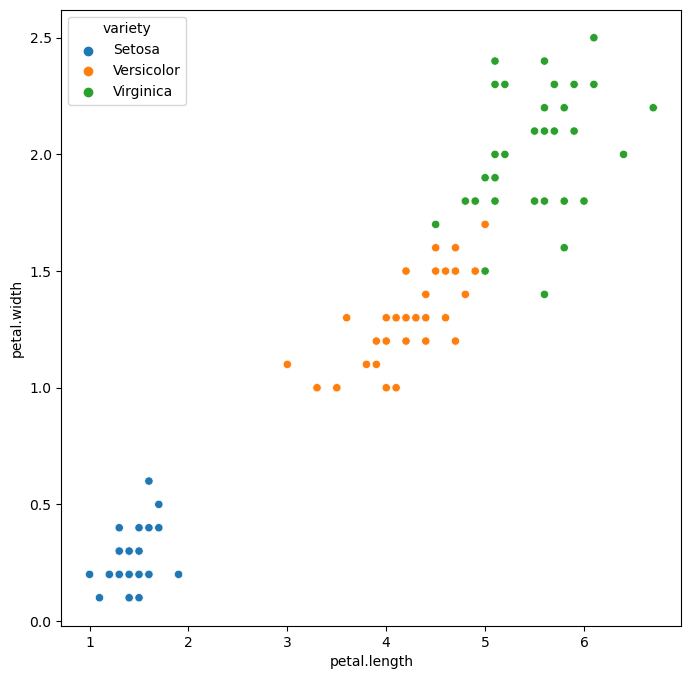

In [4]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'petal.length' , y= 'petal.width', data = df, hue = 'variety')

In [5]:
#Process missing data
df_1 = df.fillna(df.mean())
df_1

C:\Users\anhdu\AppData\Local\Temp\ipykernel_13440\773745762.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1 = df.fillna(df.mean())


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.100000,3.500000,1.400000,0.20000,Setosa
1,4.900000,3.000000,3.719259,0.20000,Setosa
2,4.700000,3.200000,1.300000,0.20000,Setosa
3,4.600000,3.100000,1.500000,1.18963,Setosa
4,5.000000,3.600000,1.400000,0.20000,Setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.30000,Virginica
146,6.300000,3.054815,5.000000,1.90000,Virginica
147,5.852593,3.054815,5.200000,2.00000,Virginica
148,5.852593,3.400000,3.719259,2.30000,Virginica


In [6]:
#check null
df_1.isnull().sum()

sepal.length     0
sepal.width      0
petal.length     0
petal.width      0
variety         15
dtype: int64

In [7]:
most_frequent_value = df_1['variety'].value_counts().index[0]
df_1['variety'] = df_1['variety'].fillna(most_frequent_value)
df_1

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.100000,3.500000,1.400000,0.20000,Setosa
1,4.900000,3.000000,3.719259,0.20000,Setosa
2,4.700000,3.200000,1.300000,0.20000,Setosa
3,4.600000,3.100000,1.500000,1.18963,Setosa
4,5.000000,3.600000,1.400000,0.20000,Setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.200000,2.30000,Virginica
146,6.300000,3.054815,5.000000,1.90000,Virginica
147,5.852593,3.054815,5.200000,2.00000,Virginica
148,5.852593,3.400000,3.719259,2.30000,Virginica


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split


In [9]:
df_2 = df_1.copy()

In [10]:
#data normalization-Min-Max Scaling
columns_to_normalize = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
scaler = MinMaxScaler()
df_1[columns_to_normalize] = scaler.fit_transform(df_1[columns_to_normalize])

df_2 = df_1[columns_to_normalize]
df_2

,sepal.length,sepal.width,petal.length,petal.width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.460891,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.454012
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.439506,0.677966,0.750000
147,0.431276,0.439506,0.711864,0.791667
148,0.431276,0.583333,0.460891,0.916667


In [11]:
df_3 = df_2.copy()
s1 = df['variety']
s2 = df_3
s = pd.concat([s2,s1],axis = 1)



In [12]:
df_4 = s.copy()
train = s.copy()

In [13]:
label=LabelEncoder()
for c in  df_4.columns:
    if(df_4[c].dtype=='object'):
        train[c]=label.fit_transform(df_4[c])
    else:
        train[c]=df_4[c]

train


,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.460891,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.454012,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.439506,0.677966,0.750000,2
147,0.431276,0.439506,0.711864,0.791667,2
148,0.431276,0.583333,0.460891,0.916667,2


<AxesSubplot:>

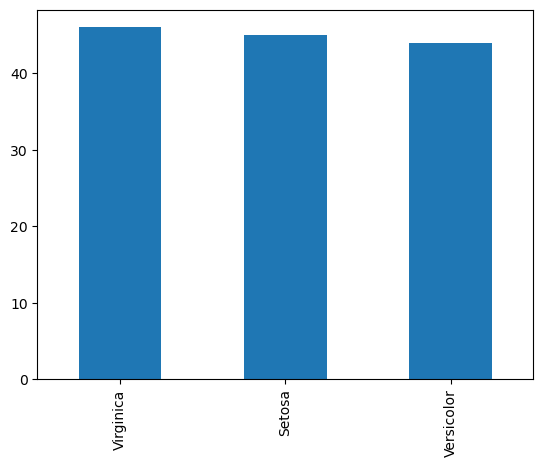

In [14]:
df["variety"].value_counts().plot(kind="bar")

In [15]:
df_5 = train.copy()

In [16]:
X = df_5.drop("variety", axis=1)
y = df_5["variety"]
display(X)
display(y)

,sepal.length,sepal.width,petal.length,petal.width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.460891,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.454012
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.439506,0.677966,0.750000
147,0.431276,0.439506,0.711864,0.791667
148,0.431276,0.583333,0.460891,0.916667


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

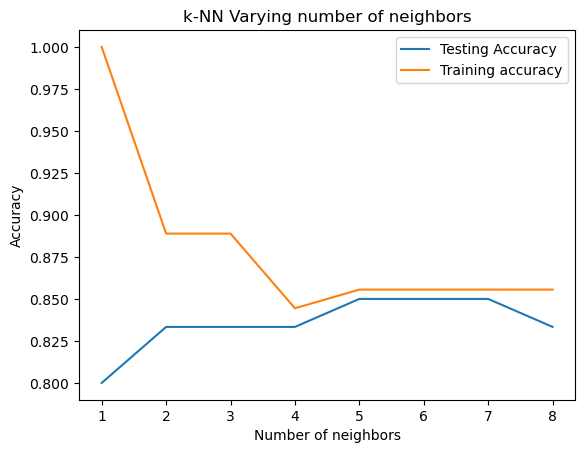

In [20]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [22]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.85
KNN f1 score:  0.8067932067932068
KNN confusion matrix: 
[[18  0  0  0]
 [ 0 18  0  0]
 [ 0  3 15  0]
 [ 3  3  0  0]]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [24]:


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM accuracy: ", accuracy_score(y_test, y_pred))
print("SVM f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

SVM accuracy:  0.8166666666666667
SVM f1 score:  0.7739905256034287
SVM confusion matrix: 
[[18  0  0  0]
 [ 0 18  0  0]
 [ 0  5 13  0]
 [ 3  3  0  0]]


In [25]:
from sklearn.metrics import classification_report


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       0.69      1.00      0.82        18
           2       1.00      0.72      0.84        18
           3       0.00      0.00      0.00         6

    accuracy                           0.82        60
   macro avg       0.64      0.68      0.64        60
weighted avg       0.76      0.82      0.77        60



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
